# Case Study - Classification of Patients with  Blood Pressure Abnormality

# Steps to solve this classification problem 

Basic exploration of data before building models

Understanding the correlation of features and confirm with some Hypothetical tests.

Splitting datasets into train and test datasets

Build and testing different models like Logistics Regression, SVM, Random Forest etc

Find overall accuracy of the model

Understand Confusion matrix

Understand TPR, FPR, Precision, Recall, Sensitivity & Speficity

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\rimanshu\\Desktop\\Jupyter\\Absolute Data\\Case Study 1\\Case Study 1\\Training Data - Classification of Patients with Abnormal Blood Pressure (N=2000)_27-Jul-2016.csv")

df.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
Patient_Number                   2000 non-null int64
Blood_Pressure_Abnormality       2000 non-null int64
Level_of_Hemoglobin              2000 non-null float64
Genetic_Pedigree_Coefficient     1908 non-null float64
Age                              2000 non-null int64
BMI                              2000 non-null int64
Sex                              2000 non-null int64
Pregnancy                        442 non-null float64
Smoking                          2000 non-null int64
Physical_activity                2000 non-null int64
salt_content_in_the_diet         2000 non-null int64
alcohol_consumption_per_day      1758 non-null float64
Level_of_Stress                  2000 non-null int64
Chronic_kidney_disease           2000 non-null int64
Adrenal_and_thyroid_disorders    2000 non-null int64
dtypes: float64(4), int64(11)
memory usage: 234.5 KB


In [9]:
df.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [6]:
df["Pregnancy"].isnull().value_counts(normalize=True)
#Pregnency column has more tham 77% null values so we should drop that column in Handling Missing value section.

True     0.779
False    0.221
Name: Pregnancy, dtype: float64

In [34]:
df["Genetic_Pedigree_Coefficient"].isnull().value_counts(normalize=True)

False    0.954
True     0.046
Name: Genetic_Pedigree_Coefficient, dtype: float64

In [35]:
df["alcohol_consumption_per_day"].isnull().value_counts(normalize=True)

False    0.879
True     0.121
Name: alcohol_consumption_per_day, dtype: float64

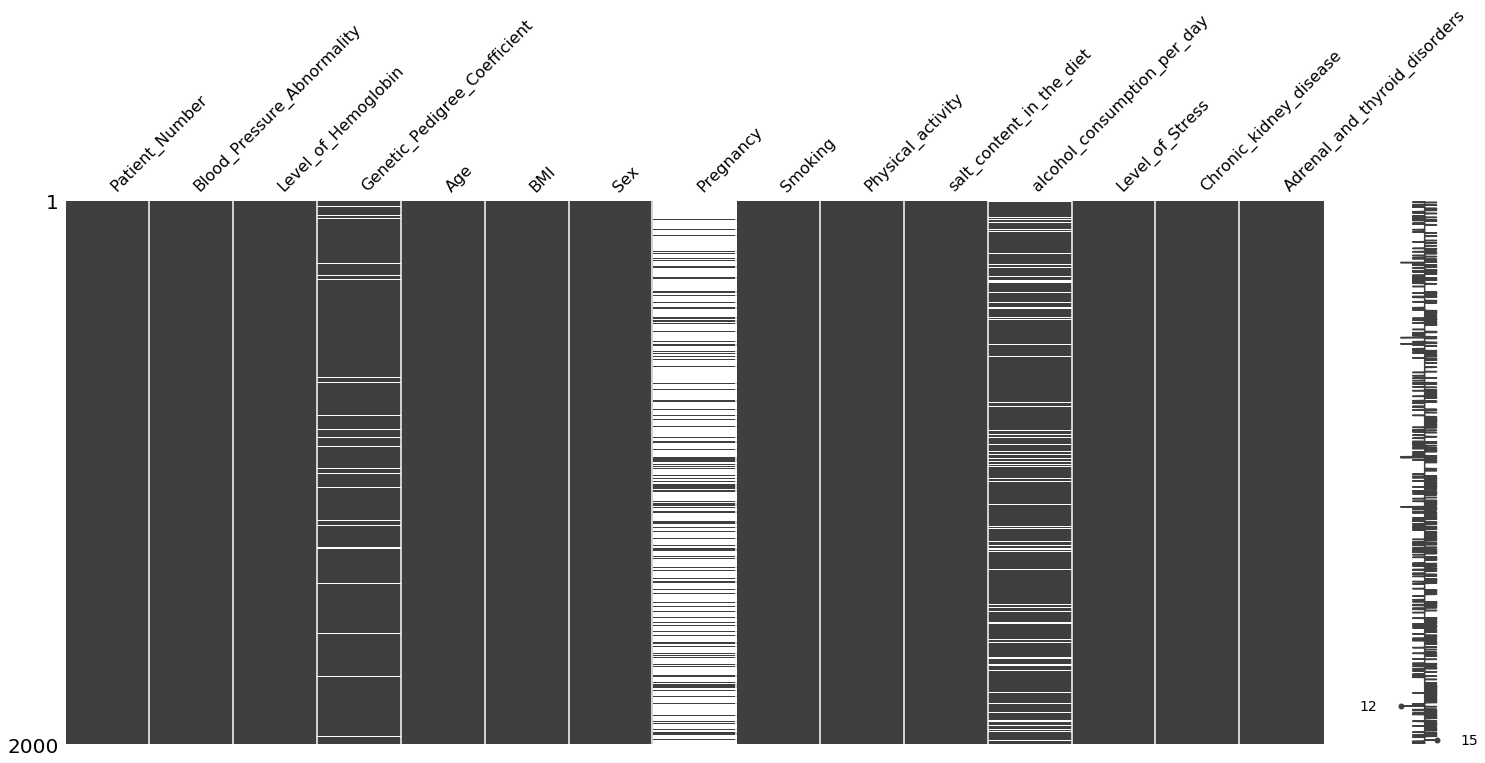

In [26]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

import missingno

missingno.matrix( df )

# Handle Missing Values for 3 columns seen

In [5]:
df.drop("Pregnancy", axis=1,inplace=True)

In [6]:
# We cannot use mode in this case beacuse there is no most frequent value in compare to others by using df['Genetic_Pedigree_Coefficient'].value_counts()
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.NaN, strategy='mean')
df['Genetic_Pedigree_Coefficient'] = imputer.fit_transform(df[['Genetic_Pedigree_Coefficient']])

In [7]:
# We cannot use mode in this case beacuse there is no most frequent value in compare to others by using df['alcohol_consumption_per_day'].value_counts()
df['alcohol_consumption_per_day'].fillna(df['alcohol_consumption_per_day'].mean(),inplace=True)

In [8]:
df.info() # Now we have removed all missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
Patient_Number                   2000 non-null int64
Blood_Pressure_Abnormality       2000 non-null int64
Level_of_Hemoglobin              2000 non-null float64
Genetic_Pedigree_Coefficient     2000 non-null float64
Age                              2000 non-null int64
BMI                              2000 non-null int64
Sex                              2000 non-null int64
Smoking                          2000 non-null int64
Physical_activity                2000 non-null int64
salt_content_in_the_diet         2000 non-null int64
alcohol_consumption_per_day      2000 non-null float64
Level_of_Stress                  2000 non-null int64
Chronic_kidney_disease           2000 non-null int64
Adrenal_and_thyroid_disorders    2000 non-null int64
dtypes: float64(3), int64(11)
memory usage: 218.8 KB


# Number of observations available for people with 	Blood_Pressure_Abnormality and without 	Blood_Pressure_Abnormality

In [14]:
df.Blood_Pressure_Abnormality.value_counts(normalize=True)
## It Means Classes are balanced and equally distributed.

0    0.5065
1    0.4935
Name: Blood_Pressure_Abnormality, dtype: float64

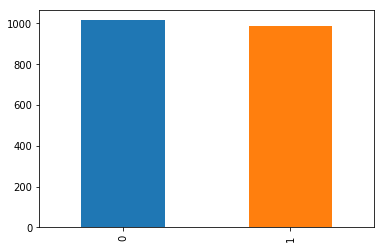

In [15]:
df.Blood_Pressure_Abnormality.value_counts().plot.bar()

# Bivariant Analysis of categorical features

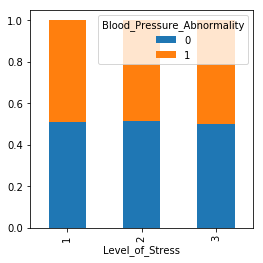

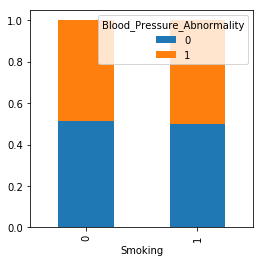

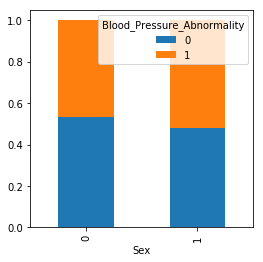

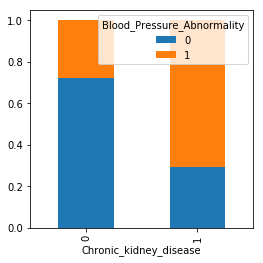

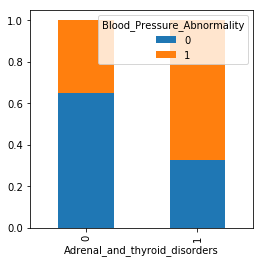

In [16]:
Level_of_Stress = pd.crosstab(df['Level_of_Stress'],df['Blood_Pressure_Abnormality'])
Smoking = pd.crosstab(df['Smoking'],df['Blood_Pressure_Abnormality'])
Sex = pd.crosstab(df['Sex'],df['Blood_Pressure_Abnormality'])
Chronic_kidney_disease = pd.crosstab(df['Chronic_kidney_disease'],df['Blood_Pressure_Abnormality'])
Adrenal_and_thyroid_disorders = pd.crosstab(df['Adrenal_and_thyroid_disorders'],df['Blood_Pressure_Abnormality'])

Level_of_Stress.div(Level_of_Stress.sum(1).astype(float),axis=0).plot(kind ='bar',stacked ='True', figsize =(4,4))
plt.show()

Smoking.div(Smoking.sum(1).astype(float),axis=0).plot(kind='bar',stacked='True',figsize=(4,4))
plt.show()

Sex.div(Sex.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Chronic_kidney_disease.div(Chronic_kidney_disease.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Adrenal_and_thyroid_disorders.div(Adrenal_and_thyroid_disorders.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

# Data distribution and univariant analysis of Numerical Features.

C:\Users\rimanshu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


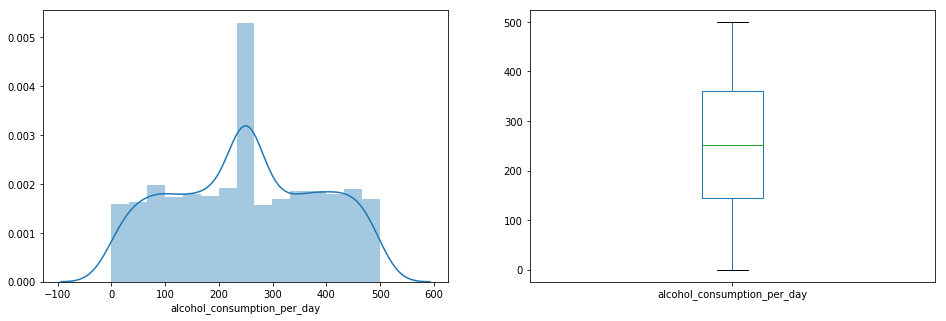

In [17]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['alcohol_consumption_per_day'])

plt.subplot(122)
df['alcohol_consumption_per_day'].plot.box(figsize=(16,5))

plt.show()

# I have checked for salt_content_in_the_diet, Physical_activity, Genetic_Pedigree_Coefficient, Age, BMI and observed that
#all are uniform distribution with no outliers and Same we can show for all discreate and continius variables.

# Correlation between features

C:\Users\rimanshu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\rimanshu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rimanshu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\rimanshu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


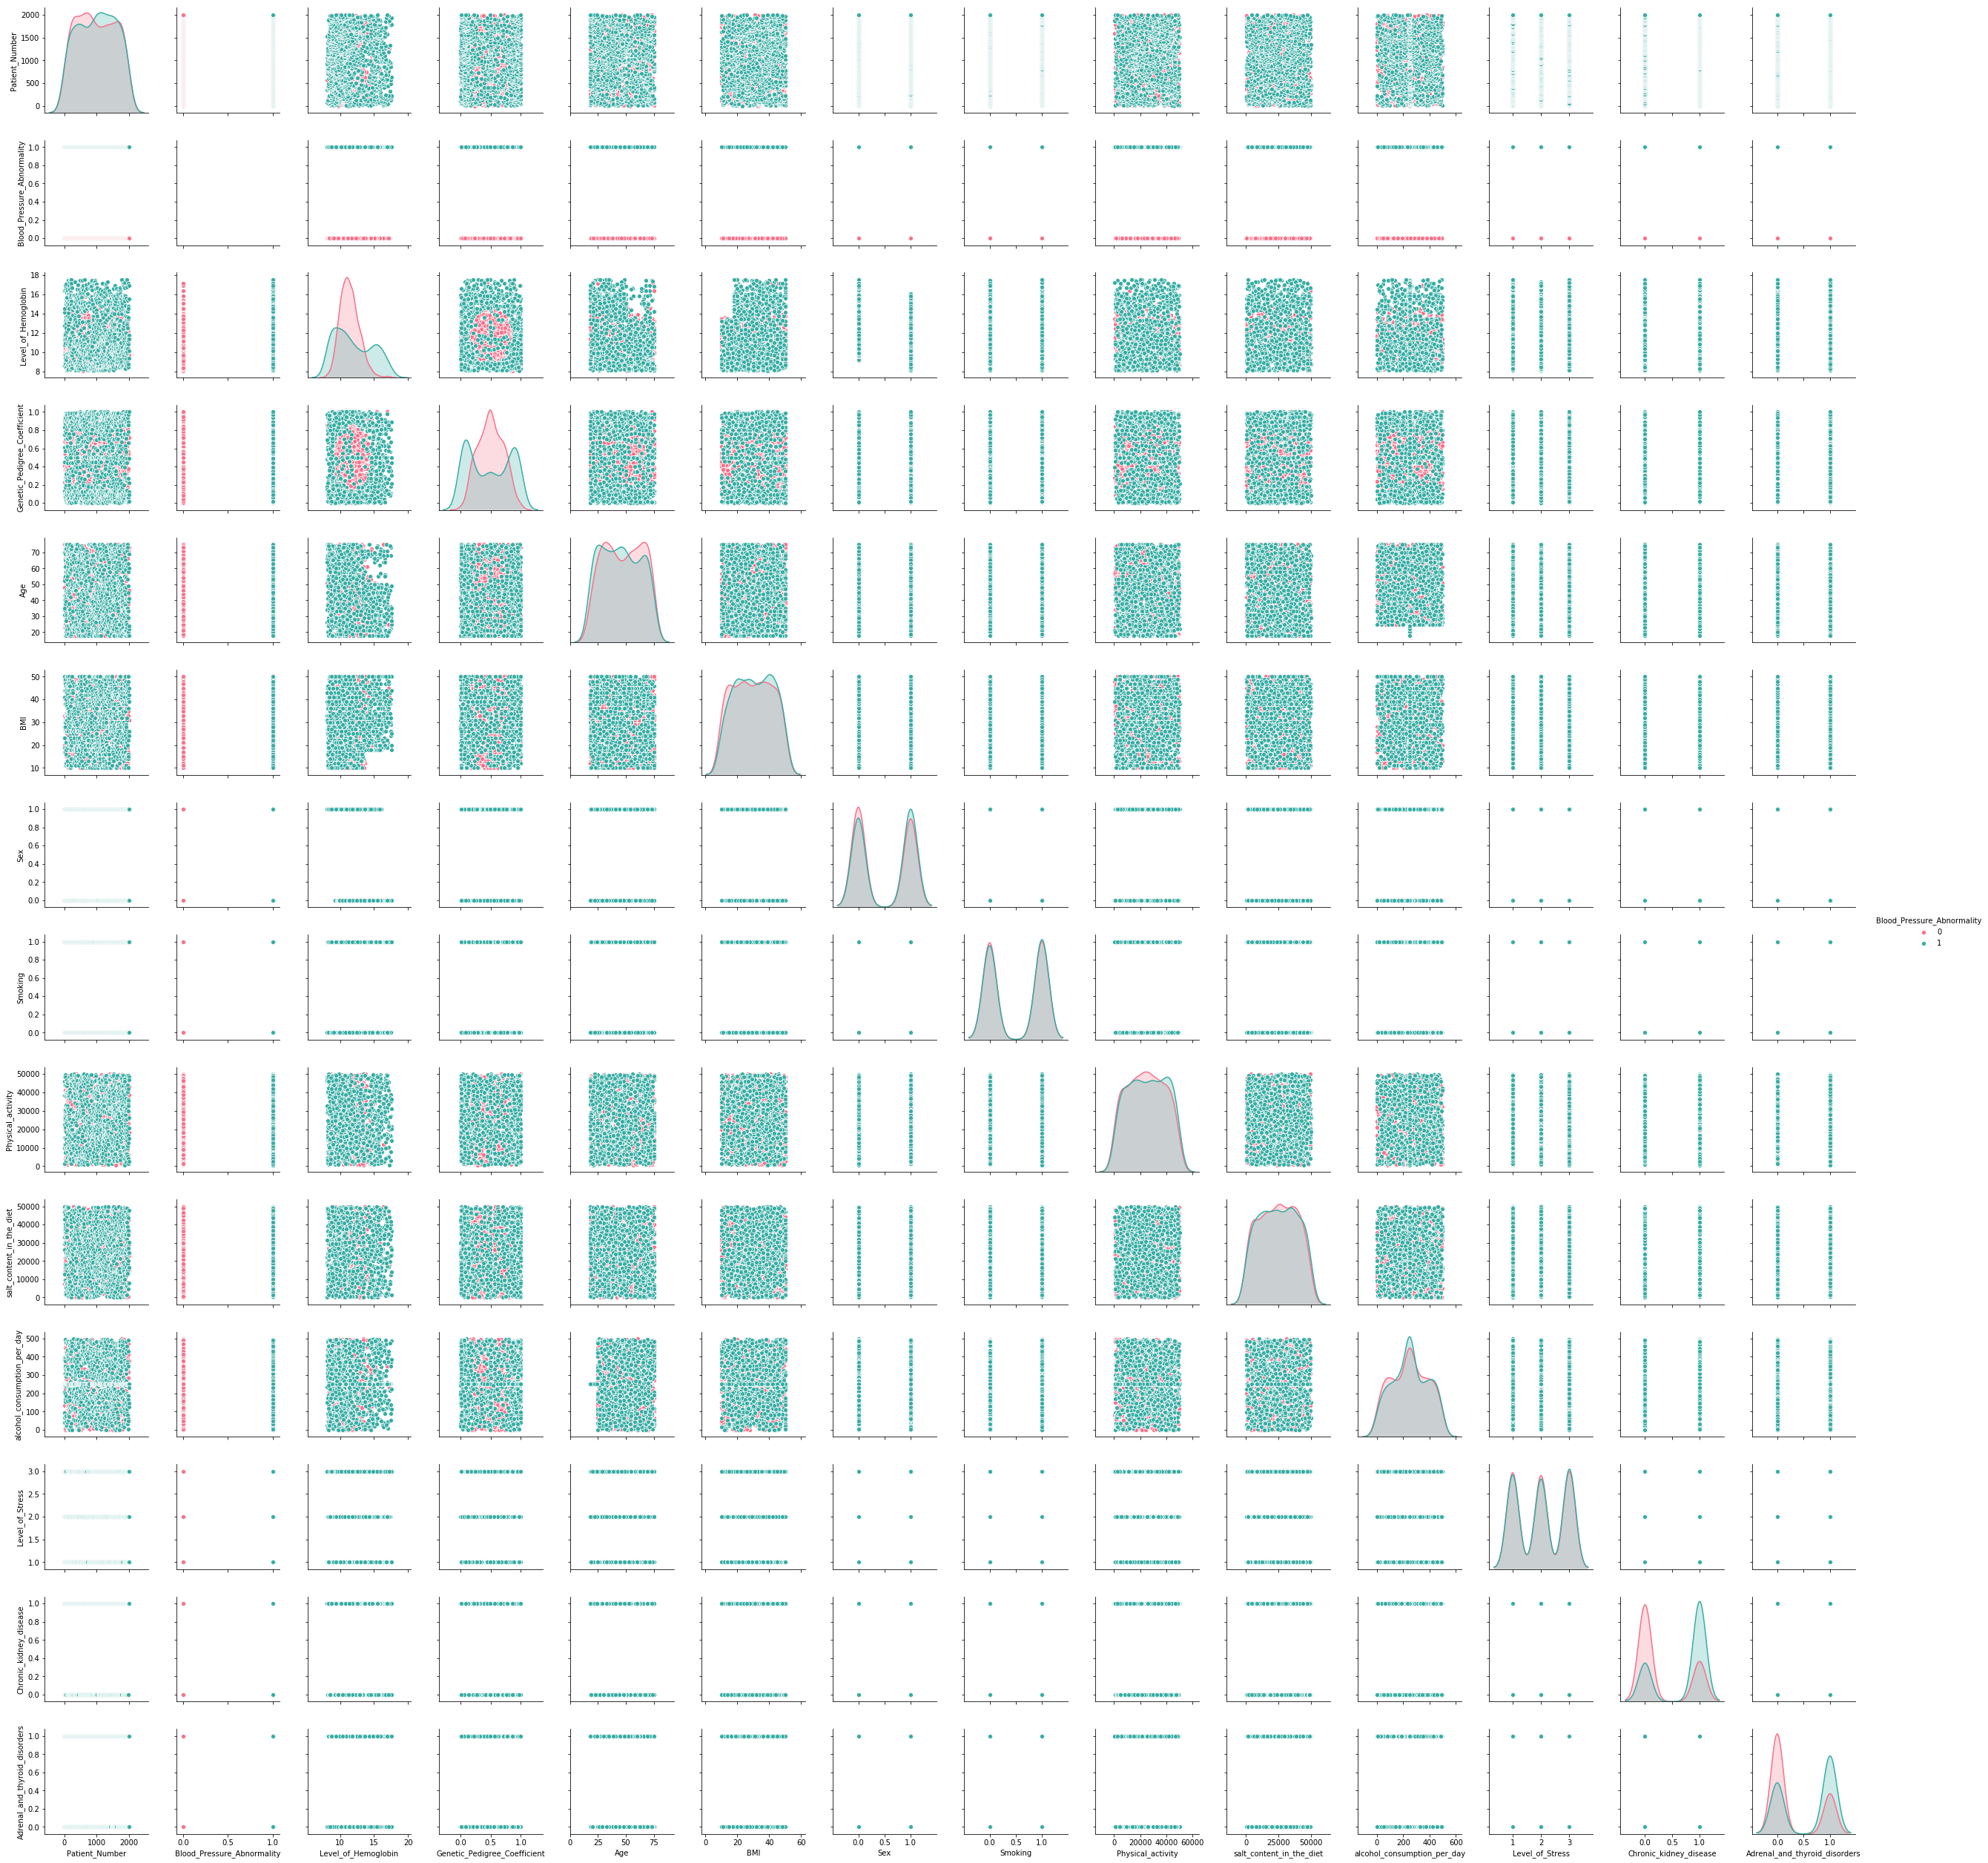

In [61]:
sn.pairplot(df, hue = "Blood_Pressure_Abnormality", palette="husl")

In [18]:
df.corr()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
Patient_Number,1.000000,0.021430,-0.001083,-0.005129,-0.030827,-0.000281,0.023494,0.022939,0.016808,0.022992,-0.024017,-0.013779,0.030543,0.004823
Blood_Pressure_Abnormality,0.021430,1.000000,0.139488,-0.032682,-0.066322,0.040193,0.054902,0.012250,0.037952,0.014199,0.019459,0.009304,0.429188,0.318598
Level_of_Hemoglobin,-0.001083,0.139488,1.000000,-0.023036,-0.184394,0.117889,-0.412928,0.023349,-0.026604,0.022141,0.007196,0.004746,0.055262,0.030384
Genetic_Pedigree_Coefficient,-0.005129,-0.032682,-0.023036,1.000000,-0.021595,-0.009976,0.022564,-0.036029,-0.007450,0.038187,-0.019106,0.012621,0.040555,0.008149
Age,-0.030827,-0.066322,-0.184394,-0.021595,1.000000,0.028151,0.057941,0.025314,0.027068,-0.045740,0.014626,0.014057,-0.057540,-0.025738
BMI,-0.000281,0.040193,0.117889,-0.009976,0.028151,1.000000,0.010219,0.008927,-0.004936,0.026385,-0.038505,-0.010689,0.012221,0.041061
Sex,0.023494,0.054902,-0.412928,0.022564,0.057941,0.010219,1.000000,-0.000848,0.006297,-0.009347,0.004140,0.000729,0.026082,-0.011981
Smoking,0.022939,0.012250,0.023349,-0.036029,0.025314,0.008927,-0.000848,1.000000,-0.014974,0.003364,0.008129,-0.026398,-0.025196,0.018267
Physical_activity,0.016808,0.037952,-0.026604,-0.007450,0.027068,-0.004936,0.006297,-0.014974,1.000000,-0.032261,-0.010629,-0.033700,0.003938,0.000883
salt_content_in_the_diet,0.022992,0.014199,0.022141,0.038187,-0.045740,0.026385,-0.009347,0.003364,-0.032261,1.000000,-0.027998,-0.019268,-0.002856,0.019965


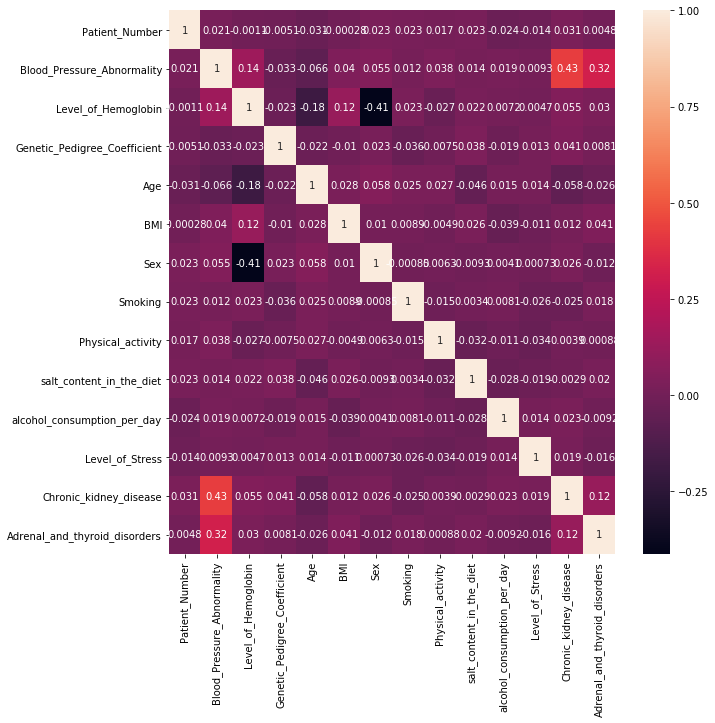

In [76]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap( df.corr(), annot=True, ax=ax );

# Few Initial Observations

1) Chronic_kidney_disease is highly corelated to Blood_Pressure_Abnormality

2) Adrenal_and_thyroid_disorders is highly corelated to Blood_Pressure_Abnormality

3) Level_of_Hemoglobin is highly corelated to Blood_Pressure_Abnormality

C:\Users\rimanshu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


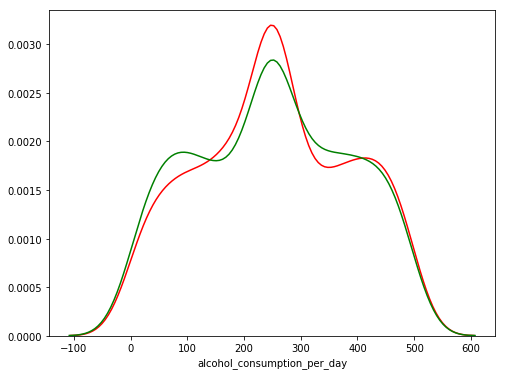

In [20]:
plt.figure(figsize=(8, 6))

sns.distplot( df[ df.Blood_Pressure_Abnormality == 1 ].alcohol_consumption_per_day,
          hist = False,
          color = 'r' )

sns.distplot( df[ df.Blood_Pressure_Abnormality == 0 ].alcohol_consumption_per_day,
          hist = False,
          color = 'g' )

In [21]:
import scipy.stats as stats
stats.ttest_ind(df[ df.Blood_Pressure_Abnormality == 0 ].alcohol_consumption_per_day,
               df[ df.Blood_Pressure_Abnormality == 1 ].alcohol_consumption_per_day)

Ttest_indResult(statistic=-0.8699747114628423, pvalue=0.38441872737898575)

C:\Users\rimanshu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


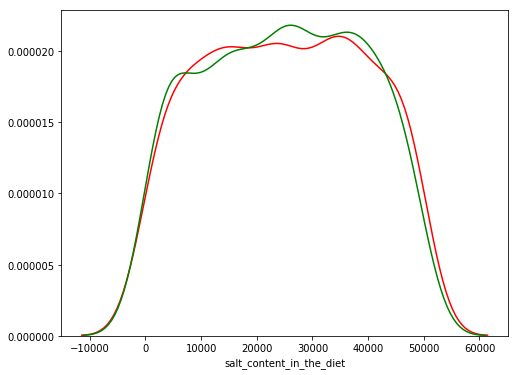

In [92]:
plt.figure(figsize=(8, 6))

sn.distplot( df[ df.Blood_Pressure_Abnormality == 1 ].salt_content_in_the_diet,
          hist = False,
          color = 'r' )

sn.distplot( df[ df.Blood_Pressure_Abnormality == 0 ].salt_content_in_the_diet,
          hist = False,
          color = 'g' )

In [104]:
import scipy.stats as stats
stats.ttest_ind(df[ df.Blood_Pressure_Abnormality == 0 ].salt_content_in_the_diet,
               df[ df.Blood_Pressure_Abnormality == 1 ].salt_content_in_the_diet)

Ttest_indResult(statistic=-0.634732217299003, pvalue=0.5256757508002415)

C:\Users\rimanshu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


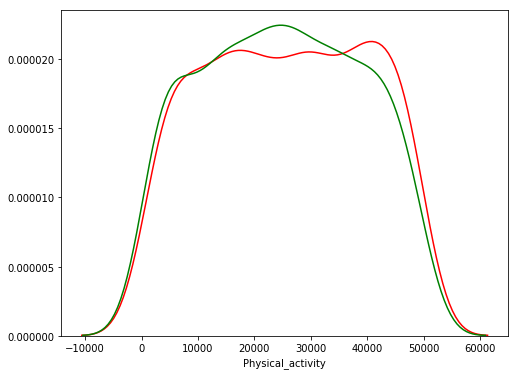

In [23]:
plt.figure(figsize=(8, 6))

sns.distplot( df[ df.Blood_Pressure_Abnormality == 1 ].Physical_activity,
          hist = False,
          color = 'r' )

sns.distplot( df[ df.Blood_Pressure_Abnormality == 0 ].Physical_activity,
          hist = False,
          color = 'g' )

# Note :-

Average achohol consumption of people, Physical_activity and salt_content_in_the_diet with Abnormality and Normality are same. So, these may be a non significant factor in determining or predicting CHD.

C:\Users\rimanshu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


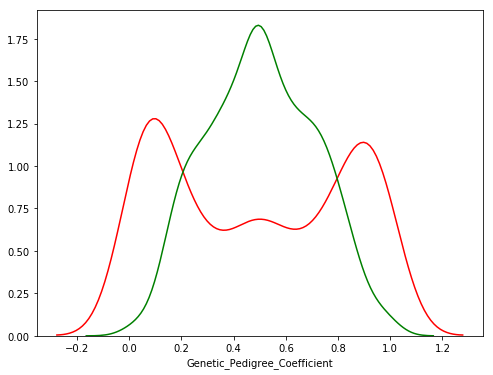

In [24]:
plt.figure(figsize=(8, 6))

sns.distplot( df[ df.Blood_Pressure_Abnormality == 1 ].Genetic_Pedigree_Coefficient,
          hist = False,
          color = 'r' )

sns.distplot( df[ df.Blood_Pressure_Abnormality == 0 ].Genetic_Pedigree_Coefficient,
          hist = False,
          color = 'g' )

C:\Users\rimanshu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


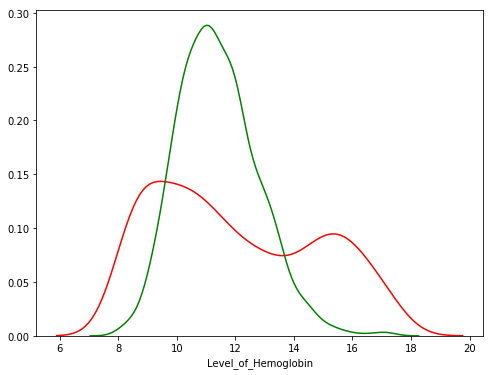

In [25]:
plt.figure(figsize=(8, 6))

sns.distplot( df[ df.Blood_Pressure_Abnormality == 1 ].Level_of_Hemoglobin,
          hist = False,
          color = 'r' )

sns.distplot( df[ df.Blood_Pressure_Abnormality == 0 ].Level_of_Hemoglobin,
          hist = False,
          color = 'g' )

# Making Model and splitting dataset for training and testing

In [26]:
df.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Smoking',
       'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split
X = df.drop("Blood_Pressure_Abnormality", axis =1)
y = df["Blood_Pressure_Abnormality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
len(X_train)

1400

In [49]:
len(X_test)

600

In [10]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
log_model.coef_

array([[-1.75275314e-06,  7.45506130e-02, -1.10877065e+00,
        -8.53615370e-03, -4.44209433e-03,  3.59002643e-01,
         6.69883828e-04,  1.95831908e-06,  5.94798846e-07,
         1.89117372e-05, -8.09545743e-02,  1.65478959e+00,
         1.31985252e+00]])

In [54]:
list(zip(X_train.columns, log_model.coef_[0]))

[('Patient_Number', -1.7527531404237793e-06),
 ('Level_of_Hemoglobin', 0.07455061295005232),
 ('Genetic_Pedigree_Coefficient', -1.108770647956079),
 ('Age', -0.008536153695729153),
 ('BMI', -0.004442094330979599),
 ('Sex', 0.359002642795154),
 ('Smoking', 0.0006698838282281756),
 ('Physical_activity', 1.9583190848416256e-06),
 ('salt_content_in_the_diet', 5.947988463902492e-07),
 ('alcohol_consumption_per_day', 1.891173716569132e-05),
 ('Level_of_Stress', -0.08095457427415223),
 ('Chronic_kidney_disease', 1.6547895867383522),
 ('Adrenal_and_thyroid_disorders', 1.3198525242370285)]

In [55]:
log_model.intercept_

array([-1.25000055])

# Predicting in test set using the model

In [59]:
y_pred = log_model.predict(X_test)

In [107]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy_score(y_test,y_pred)

0.705

In [71]:
results = pd.DataFrame( { 'actual':  y_test,
                                   'predicted': y_pred } )

results = results.reset_index()
results.head()

,index,actual,predicted
0,1860,1,1
1,353,1,1
2,1333,0,0
3,905,0,1
4,1289,0,0


In [72]:
confusion_matrix(y_test,y_pred)

array([[234,  94],
       [ 83, 189]], dtype=int64)

# Lets Check accuracy scores of the other models also

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import model_selection


# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

In [13]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.698571 (0.032701)
K-NN: 0.485000 (0.041949)
DT: 0.835000 (0.035921)
NB: 0.772857 (0.032388)
RF: 0.857857 (0.028293)
SVM: 0.510714 (0.050835)


# "Among the above theorems Random Forest has highest Accuracy"

[Text(0,0,'LR'),
 Text(0,0,'LDA'),
 Text(0,0,'K-NN'),
 Text(0,0,'DT'),
 Text(0,0,'NB'),
 Text(0,0,'RF'),
 Text(0,0,'SVM')]

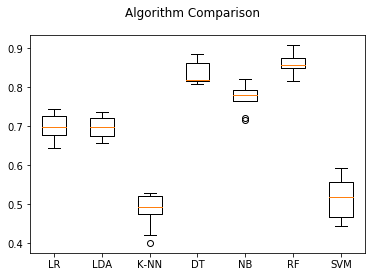

In [84]:
# Comparing Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [91]:
# Make predictions on validation dataset by choosing best Algorithm
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Accuracy :  0.8516666666666667
[[285  43]
 [ 46 226]]
             precision    recall  f1-score   support

          0       0.86      0.87      0.86       328
          1       0.84      0.83      0.84       272

avg / total       0.85      0.85      0.85       600



Text(0.5,14.0938,'rf_pred')

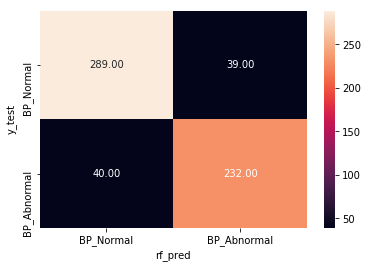

In [89]:
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True,  fmt='.2f', xticklabels = ["BP_Normal", "BP_Abnormal"] , yticklabels = ["BP_Normal", "BP_Abnormal"] )
plt.ylabel('y_test')
plt.xlabel('rf_pred')

# How good is the model? It will depends on others factors like Recall, Precision, specificity.

1) Accuracy Score is:  0.85 that means 85% is the fraction of predictions our model got right. (TP+TN)/TP+TN+FP+FN

2) recall score is: .85 that means Number of items correctly identified as positive out of total true positives. High recall means you’re not missing many positives. Recall means Sensitivity or you can say True Positive Rate -- TP/TP+FN

3) precision score is:.85 means Number of items correctly identified as positive out of total items identified as positive.  High precision means low “false alarm rate” (if you test positive, you’re probably positive) - TP/TP+FP

4) Specificity(True Negative Rate) is: Number of items correctly identified as negative out of total true negatives.
Formula is TN/TN+FN

5) f1 score is:.85 means Harmonic mean of precision and recall - (2*precision *recall)/precision +recall

6) support is the number of samples of the true response that lie in that class.